## EDSA South African Language Identification Exam

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section I import, and briefly discuss, the libraries that will be used throughout my analysis and modelling. |

---

In [128]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Libraries for data pre-processing
import re
import string
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk import WordNetLemmatizer

# Libraries For Feature Extraction, Model Building and Evaluation:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Library For Saving and Retrieving the Model File:
import pickle

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42 # random_state parameter for the train_test_split function


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section Im going to load the data from the `train` and `test` file into a DataFrame. |

---

In [129]:
#Load the train data
df_train = pd.read_csv("train_set.csv")
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [130]:
#Load the test data
df_test = pd.read_csv("test_set.csv")
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, i am going to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [131]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [132]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


In [133]:
print(df_train.shape)
print(df_test.shape)
print(df_train['lang_id'].unique())

(33000, 2)
(5682, 2)
['xho' 'eng' 'nso' 'ven' 'tsn' 'nbl' 'zul' 'ssw' 'tso' 'sot' 'afr']


In [134]:
# Count of each language
language_count = df_train.groupby('lang_id').count()['text'].reset_index().sort_values(by=['text'], ascending=False)
language_count

,lang_id,text
0,afr,3000
1,eng,3000
2,nbl,3000
3,nso,3000
4,sot,3000
5,ssw,3000
6,tsn,3000
7,tso,3000
8,ven,3000
9,xho,3000


<AxesSubplot:xlabel='lang_id', ylabel='count'>

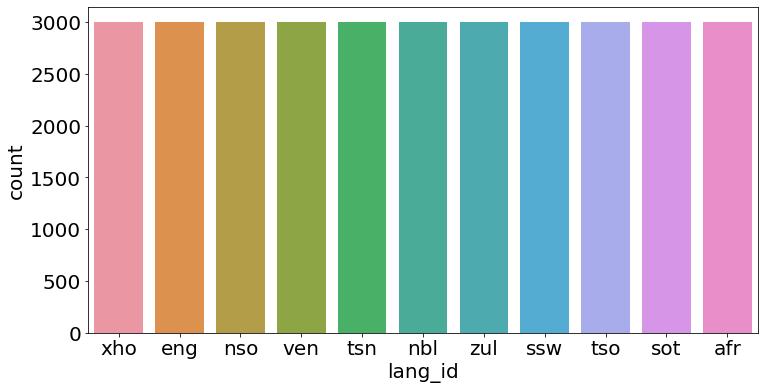

In [135]:
# visualising the language count in a barchart
plt.figure(figsize=(12, 6))
sns.countplot(x='lang_id', data=df_train)

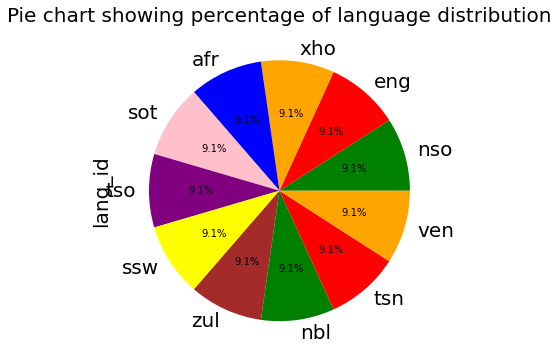

In [136]:
# Visualising the distribution of languages in the data in a Pie Chart format
plt.figure(figsize=(12,6))
df_train["lang_id"].value_counts().plot.pie(labels=['nso', 'eng', 'xho', 'afr', 'sot', 'tso', 'ssw', 'zul', 'nbl', 'tsn', 'ven'], 
                                                autopct='%.1f%%',
                                                title = 'Pie chart showing percentage of language distribution',
                                                colors = ['green','red','orange','blue','pink','purple','yellow','brown'])
plt.rc('font', size=20) 
plt.rc('axes', titlesize=20) 
plt.rc('axes', labelsize=20) 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.rc('legend', fontsize=20)

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section I will: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [137]:
# Changing all text to lower case in both the training and test data
df_train['text'] = df_train['text'].str.lower()
df_test['text'] = df_test['text'].str.lower()

In [138]:
# Removal of stopwords 
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
    
df_train["text"] = df_train["text"].apply(lambda text: remove_stopwords(text))
df_train.head()
df_test["text"] = df_test["text"].apply(lambda text: remove_stopwords(text))
df_test.head()

,index,text
0,1,"mmasepala, fa maemo kgethegileng letlelela kga..."
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu.
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta.


In [139]:
# Defining a function to remove punctuation from both the training and test data, storing the clean text in a column labelled "clean"
def remove_punctuation(message):
    return ''.join([l for l in message if l not in string.punctuation])

df_train['clean'] = df_train['text'].apply(remove_punctuation)
df_train
df_test['clean'] = df_test['text'].apply(remove_punctuation)
df_test

,index,text,clean
0,1,"mmasepala, fa maemo kgethegileng letlelela kga...",mmasepala fa maemo kgethegileng letlelela kgat...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu.,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta.,winste op buitelandse valuta
...,...,...,...
5677,5678,mark ballot private.,mark ballot private
5678,5679,ge ka kgetha ka bowena go se šomiše mofani ka ...,ge ka kgetha ka bowena go se šomiše mofani ka ...
5679,5680,"e ka kopo etsa kgetho ya hao ka hloko, hobane ...",e ka kopo etsa kgetho ya hao ka hloko hobane h...
5680,5681,"tb ke bokudi ba pmb, mme morero tla lefella tl...",tb ke bokudi ba pmb mme morero tla lefella tlh...


In [140]:
# Tokenising the text of both datasets (training and test)
tokeniser = TreebankWordTokenizer()
df_train['clean'] = df_train['clean'].apply(tokeniser.tokenize)
df_train.head()
df_test['clean'] = df_test['clean'].apply(tokeniser.tokenize)
df_test.head()

,index,text,clean
0,1,"mmasepala, fa maemo kgethegileng letlelela kga...","[mmasepala, fa, maemo, kgethegileng, letlelela..."
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...,"[uzakwaziswa, ngokufaneleko, nakungafuneka, em..."
2,3,tshivhumbeo tshi fana na ngano dza vhathu.,"[tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]"
3,4,kube inja nelikati betingevakala kutsi titsini...,"[kube, inja, nelikati, betingevakala, kutsi, t..."
4,5,winste op buitelandse valuta.,"[winste, op, buitelandse, valuta]"


In [141]:
# Lemmatization of the texts in both datasets
lemmatizer = WordNetLemmatizer()

def df_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]    

df_train['clean'] = df_train['clean'].apply(df_lemma, args=(lemmatizer, ))
df_test['clean'] = df_test['clean'].apply(df_lemma, args=(lemmatizer, ))
df_train.head()


,lang_id,text,clean
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko..."
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,"[idha, iya, kuba, nobulumko, bokubeka, umseben..."
2,eng,province kwazulu-natal department transport in...,"[province, kwazulunatal, department, transport..."
3,nso,netefatša gore ba file dilo ka moka tše le dum...,"[netefatša, gore, ba, file, dilo, ka, moka, tš..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."


In [142]:
# Detokenising the texts in both datasets
tokeniser = TreebankWordDetokenizer()

df_train['clean'] = df_train['clean'].apply(tokeniser.detokenize)
df_train.head()


df_test['clean'] = df_test['clean'].apply(tokeniser.detokenize)
df_test.head()

,index,text,clean
0,1,"mmasepala, fa maemo kgethegileng letlelela kga...",mmasepala fa maemo kgethegileng letlelela kgat...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu.,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta.,winste op buitelandse valuta


<a id="five"></a>
## 5. Modeling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, I will create one or more classification models that are able to accurately predict the language a text is in. |

---

In [143]:
# Defining the Features(X) and Labels(y):
X = df_train['clean'] 
y = df_train['lang_id'] 

In [144]:
# Creating Vectorizer Instance:
vect = TfidfVectorizer()
# Transforming the features(X):
X = vect.fit_transform(X)

In [145]:
# Splitting the train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
# Creating instances for the models and training the models
# Logistic Regression Model
lg = LogisticRegression(max_iter=1000)
lg.fit(X_train, y_train)

# Random Forest Classifier Model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Support Vector Classifier
svc = LinearSVC()
svc.fit(X_train, y_train)

# Naive Bayes model
nb = ComplementNB()
nb.fit(X_train, y_train)



ComplementNB()

In [147]:
# Making Predictions using X_test 
# Logistic Regression Model Predictions
lg_preds = lg.predict(X_test)

# Random Forest Classifier Model Predictions
rfc_preds = rfc.predict(X_test)

# Support Vector Classifier Predictions
svc_preds = svc.predict(X_test)

# Naive Bayes Model Predictions
nb_preds = nb.predict(X_test)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section i will compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

## Performance metrics
Evaluating the metrics for each model

In [148]:
# Logistic Regression model
print(classification_report(y_test, lg_preds, target_names=df_train['lang_id'].unique()))

              precision    recall  f1-score   support

         xho       1.00      0.99      0.99       583
         eng       0.99      1.00      1.00       615
         nso       0.99      0.99      0.99       583
         ven       1.00      0.99      1.00       625
         tsn       1.00      1.00      1.00       618
         nbl       0.99      1.00      0.99       584
         zul       1.00      1.00      1.00       598
         ssw       1.00      1.00      1.00       561
         tso       1.00      1.00      1.00       634
         sot       0.99      1.00      0.99       609
         afr       0.98      0.98      0.98       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



In [149]:
# Random Forest Classifier model
print(classification_report(y_test, rfc_preds, target_names=df_train['lang_id'].unique()))

              precision    recall  f1-score   support

         xho       1.00      1.00      1.00       583
         eng       0.99      1.00      0.99       615
         nso       0.98      0.95      0.97       583
         ven       1.00      1.00      1.00       625
         tsn       1.00      1.00      1.00       618
         nbl       0.97      0.98      0.98       584
         zul       1.00      1.00      1.00       598
         ssw       1.00      1.00      1.00       561
         tso       1.00      1.00      1.00       634
         sot       0.98      0.98      0.98       609
         afr       0.95      0.95      0.95       590

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



In [150]:
# Support Vector Classifier
print(classification_report(y_test, svc_preds, target_names=df_train['lang_id'].unique()))

              precision    recall  f1-score   support

         xho       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nso       0.99      0.99      0.99       583
         ven       1.00      1.00      1.00       625
         tsn       1.00      1.00      1.00       618
         nbl       1.00      1.00      1.00       584
         zul       1.00      1.00      1.00       598
         ssw       1.00      1.00      1.00       561
         tso       1.00      1.00      1.00       634
         sot       0.99      1.00      0.99       609
         afr       0.99      0.99      0.99       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



In [151]:
# Naive Bayes Model
print(classification_report(y_test, nb_preds, target_names=df_train['lang_id'].unique()))

              precision    recall  f1-score   support

         xho       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nso       0.99      0.99      0.99       583
         ven       1.00      1.00      1.00       625
         tsn       1.00      1.00      1.00       618
         nbl       1.00      1.00      1.00       584
         zul       1.00      1.00      1.00       598
         ssw       1.00      1.00      1.00       561
         tso       1.00      1.00      1.00       634
         sot       1.00      1.00      1.00       609
         afr       1.00      0.98      0.99       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



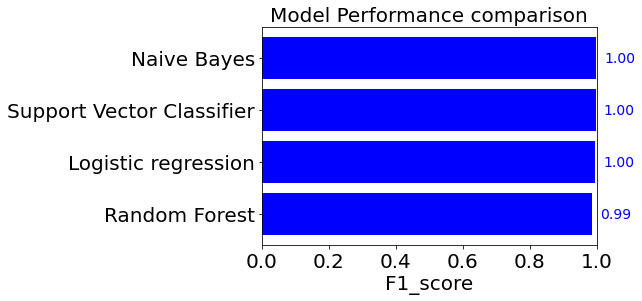

In [153]:
# Isolating the F1 scores so that they can be visualised in a bar graph
f1_lg = f1_score(y_test, lg_preds, average='macro')
f1_rfc = f1_score(y_test, rfc_preds, average='macro')
f1_svc = f1_score(y_test, svc_preds, average='macro')
f1_nb = f1_score(y_test, nb_preds, average='macro')

# Creating the Bargrap - this will help me decide which to move forward with
models = ['Naive Bayes','Support Vector Classifier', 'Logistic regression', 'Random Forest']
f1_score = [f1_nb, f1_svc, f1_lg, f1_rfc]
fig, ax = plt.subplots()
hbars = ax.barh(models, f1_score, align='center',color=['blue'])
ax.set_yticks(models, labels= models)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('F1_score')
ax.set_title('Model Performance comparison')
ax.bar_label(hbars, fmt='%.2f',padding=8, color='b', fontsize=14)
ax.set_xlim(right=1)  

plt.show()

## Preparing the test data, using the models to make predictictions and creating csv files to upload to Kaggle

In [156]:
# Preparing the test data
test = df_test['clean']
test_vect = vect.transform(test)

In [157]:
# Getting predictions for that test data by using all the models
lg_preds_test = lg.predict(test_vect)
rfc_preds_test = rfc.predict(test_vect)
svc_preds_test = svc.predict(test_vect)
nb_preds_test = nb.predict(test_vect)

In [164]:
# Creating a dataframe for the predictions (Note: dataframe is changed with details of each model)
final = pd.DataFrame()
final['index'] = df_test.index + 1
final['lang_id'] = nb_preds_test
final.set_index('index', inplace=True)
final.head()

,lang_id
index,
1,tsn
2,nbl
3,ven
4,ssw
5,afr


In [165]:
# Saving final prediction as .csv: (Note: name of csv must be changed for each model)
final.to_csv('nb_preds.csv')

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, I am  going to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---